# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

First we will import the dataset and have a look into it .

From the given dataset our job is to predict weather given customer will subscribe to term deposit or not.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter/capstone/capstone 3/bank-full.csv', sep=';')

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Replacing the dependept variable to numeric 

In [ ]:
data['y'] = data['y'].str.replace('no','0')
data['y'] = data['y'].str.replace('yes','1')


In [ ]:
data['y']= data['y'].apply(pd.to_numeric)

In [ ]:
data.shape

(45211, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [ ]:
data.describe(include=['object','bool'])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


The dataset contains no null values . Hence we move forward with univariate analysis and EDA.

**EDA**

From given dataset 11.7% have subscribed to term deposit .

88.3% havent subscribed.

In [ ]:
data['y'].value_counts() 

0    39922
1     5289
Name: y, dtype: int64

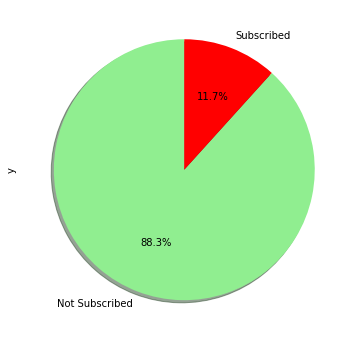

In [ ]:
data['y'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Subscribed','Subscribed'],
                               colors=['lightgreen','red'],
                               explode=[0,0]
                              )

AGE

Mostly age of all customers are from 18-60. 
There are few customers beyond that range but they are not outliers as maximum is 95 and humans can live that long and thus be part of bank.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


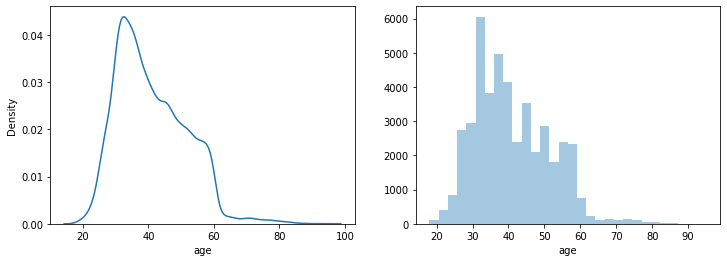

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.kdeplot(data['age'],data=data, ax=axes[0]);
sns.distplot(data['age'] , kde=False , bins=30 ,ax=axes[1]);

JOB

There are 12 categories of job. Maximum rows are of blue-collar and management category. Students are minimum and for few rows we dont know job.

In [ ]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

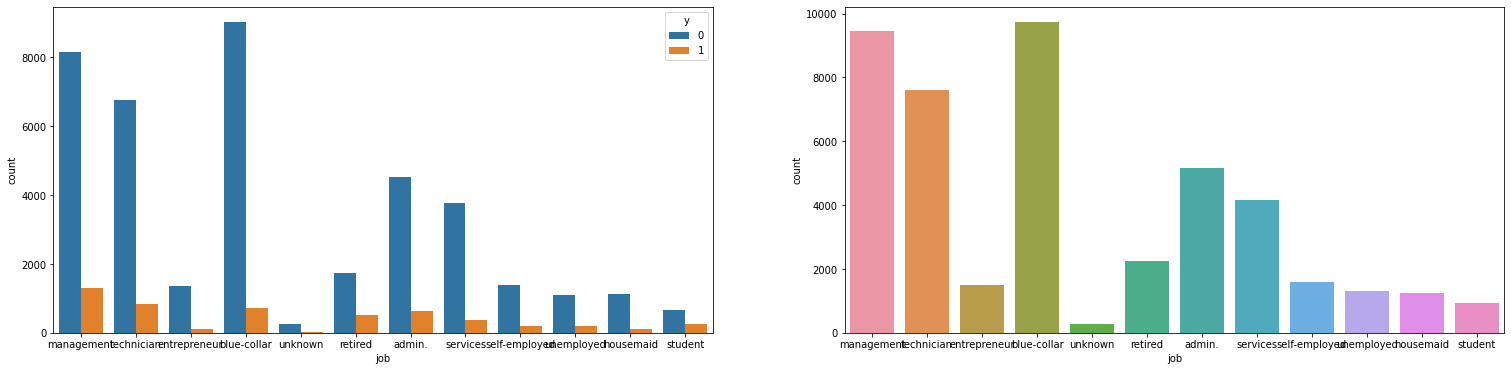

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(26, 6))

sns.countplot(x='job', hue='y',data=data, ax=axes[0]);
sns.countplot(x='job' ,data=data, ax=axes[1]);



Below we see percentage of people subscribed for term deposit from each job category. 

We find blue-clolar, entrepreneur , housemaid and service proessional people are the least who have subscribed. 

Whereas student and retired professional have maximum percentage.

Text(0.5, 1.0, '% of people subscribed for term deposit')

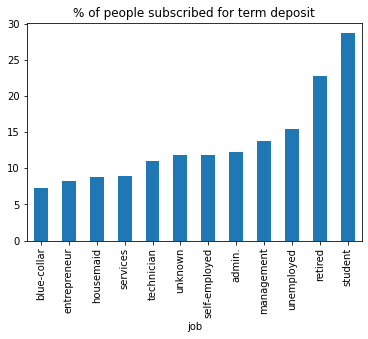

In [ ]:
((data.groupby(['job'])['y'].mean())*100).sort_values(ascending = True).plot.bar()
plt.title('% of people subscribed for term deposit')

MARITAL AND EDUCATION

For these 2 features all categories have 9-14% of customers taking term deposit which is close to avg percentage of 11.7.

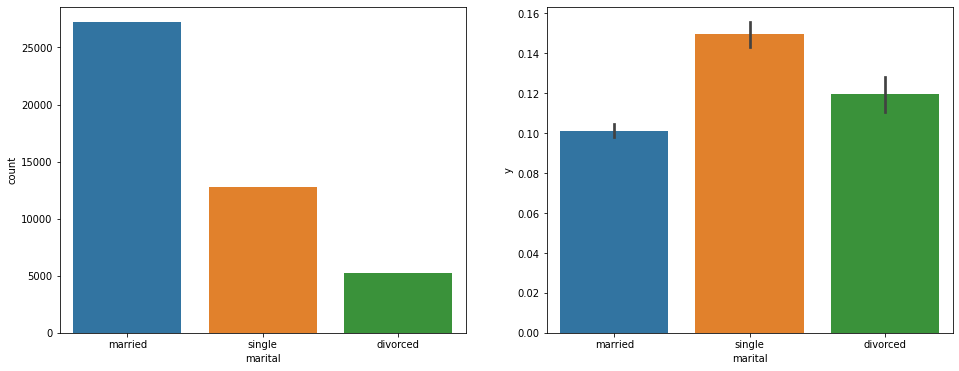

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.countplot(x='marital' , data=data , ax=axes[0]);
sns.barplot(x='marital' , y='y' , data=data, ax=axes[1]);

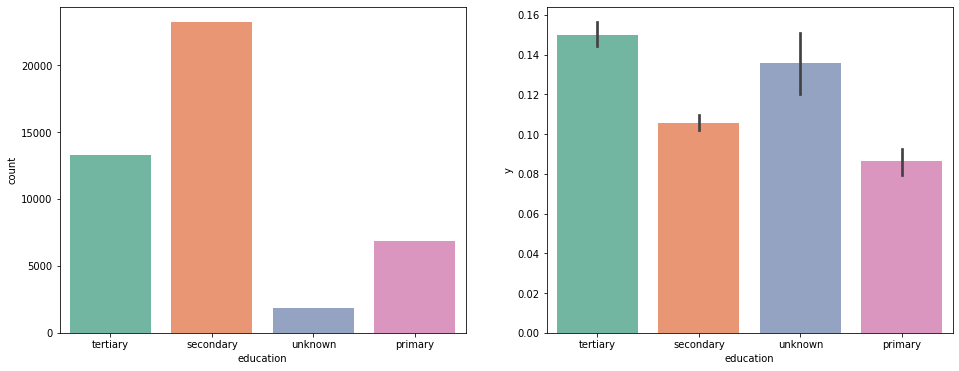

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.countplot(x='education' , data=data , ax=axes[0] , palette = "Set2");
sns.barplot(x='education' , y='y' , data=data, ax=axes[1] , palette = "Set2");

CREDIT DEFAULT , PERSONAL LOAN , HOUSING LOAN


People having credit default and personal loan their probability of taking term deposit is half as compared to people who dont have credit default or house loan.

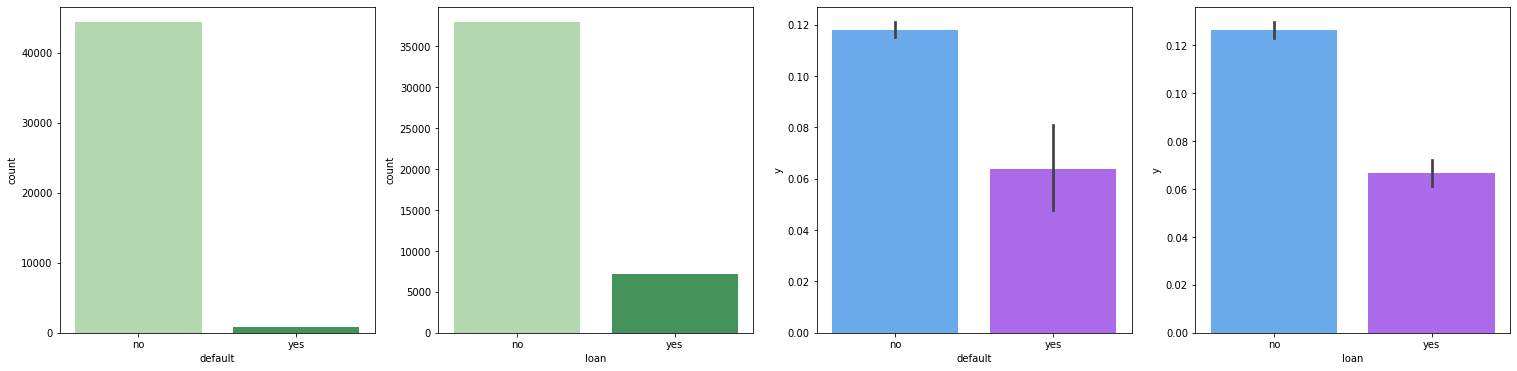

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(26, 6))

sns.countplot(x='default' ,data=data , ax=axes[0] , palette = "Greens");
sns.countplot(x='loan' ,data=data , ax=axes[1] , palette = "Greens");
sns.barplot(x='default' , y='y' , data=data, ax=axes[2] , palette = "cool");
sns.barplot(x='loan' , y='y' , data=data, ax=axes[3] , palette = "cool");

People who dont have housing loan - 17% chance of taking term deposit

People who have housing loan - 7.5 % chance of taking term deposit


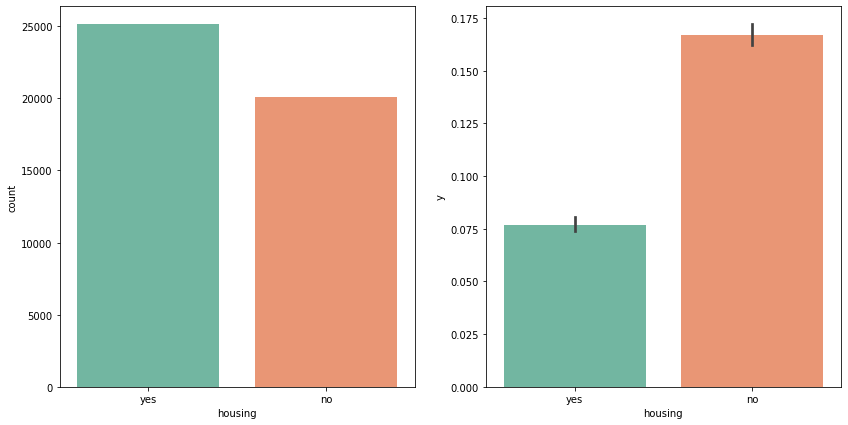

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.countplot(x='housing' ,data=data , ax=axes[0] , palette = "Set2");
sns.barplot(x='housing' , y='y' , data=data, ax=axes[1] , palette = "Set2");

MONTH

Customers who were contacted in march,december,september,october their probability of taking term deposit was lot more then avg; more then 40%.

Whereas those who were contacted in july and may their probabilty was quite low. Maybe the bank employee who contacted them didnt explain customers properly.

Text(0.5, 1.0, 'Percentage of people subscribed for term deposit when contacted in each month')

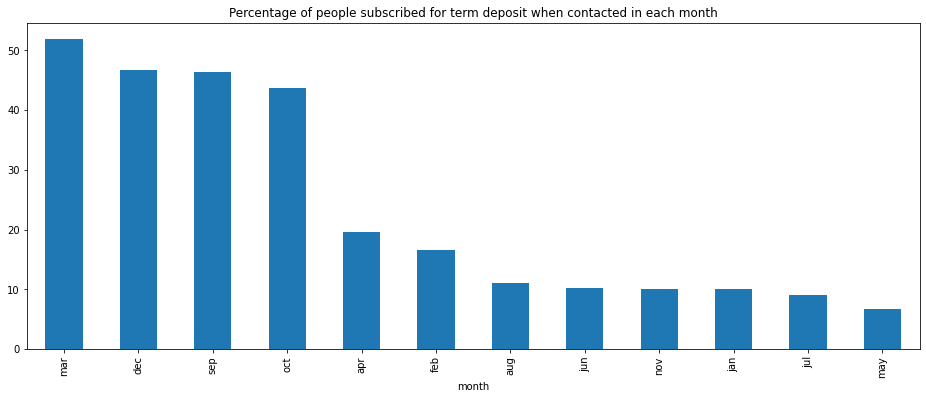

In [ ]:

((data.groupby(['month'])['y'].mean())*100).sort_values(ascending = False).plot.bar(figsize=(16,6) )
plt.title("Percentage of people subscribed for term deposit when contacted in each month")

BALANCE AND DURATION

Those who took term deposit their balance and call duration was much higher then those who didnt took term deposit.

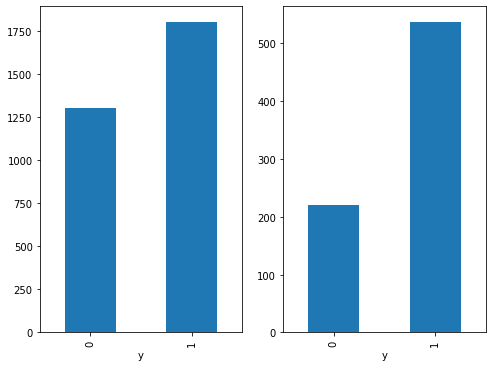

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7) )

((data.groupby(['y'])['balance'].mean())).sort_values(ascending = True).plot.bar(figsize=(8,6) ,ax=axes[0] )
((data.groupby(['y'])['duration'].mean())).sort_values(ascending = True).plot.bar(figsize=(8,6) ,ax=axes[1])

POUTCOME

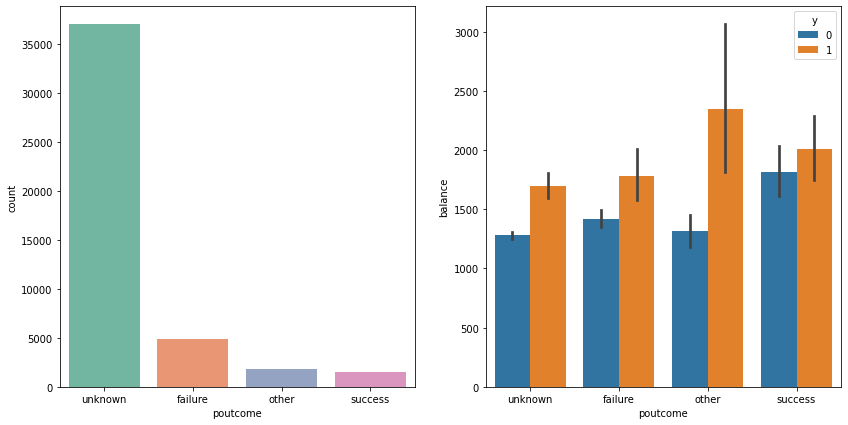

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.countplot(x='poutcome' , data=data, ax=axes[0] , palette = "Set2");
sns.barplot(x='poutcome' , y='balance' , hue='y' , data=data )

HANDLING OUTLIERS

There are lot of outliers in balance and duration column.

Hence first we find those outliers through IQR and then replace them with NAN and then remove NAN values.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


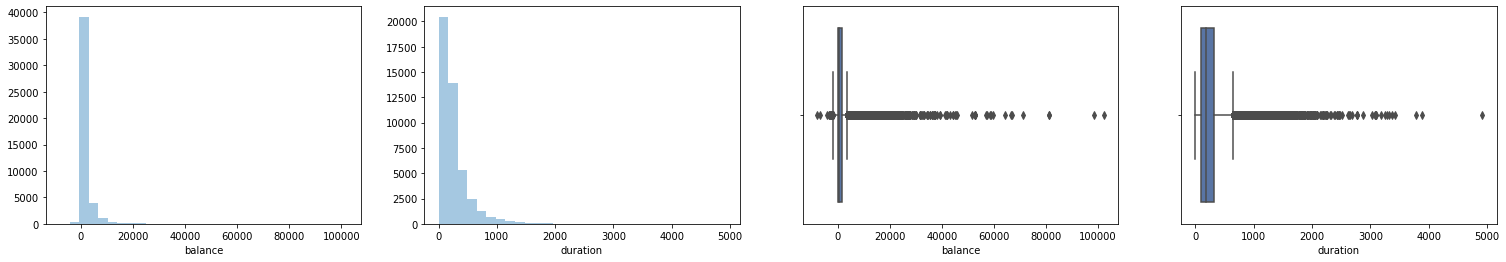

In [ ]:
  _, axes = plt.subplots(nrows=1, ncols=4, figsize=(26, 4))

sns.distplot(data['balance'] , kde=False , bins=30 ,ax=axes[0]);
sns.distplot(data['duration'] , kde=False , bins=30 ,ax=axes[1]);
sns.boxplot(data['balance'],palette="deep" , ax=axes[2]);
sns.boxplot(data['duration'],palette="deep" , ax=axes[3]);

In [ ]:
df=data.copy()

In [ ]:
cname= df[['balance', 'duration']]

#Treating Out Liers and Converting them to nan
for i in cname:
    #print(i)
    q75, q25 = np.percentile(df.loc[:,i], [85 ,15])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
#Converting to nan
    df.loc[df.loc[:,i] < minn,i] = np.nan
    df.loc[df.loc[:,i] > maxx,i] = np.nan

In [ ]:
df.dropna(subset = ["balance"], inplace=True)
df.dropna(subset = ["duration"], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


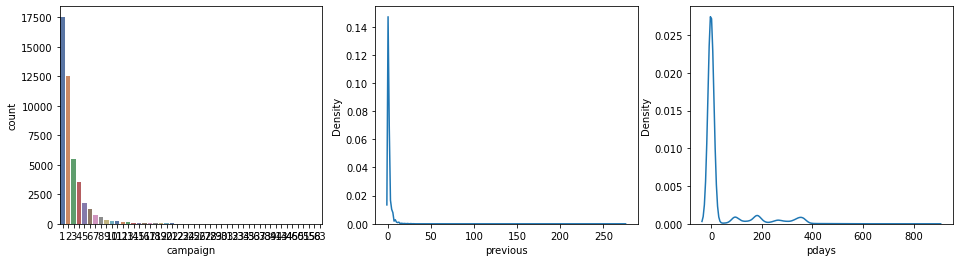

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

sns.countplot(data['campaign'],palette="deep" , ax=axes[0]);
sns.kdeplot(data['previous'],data=data, ax=axes[1]);
sns.kdeplot(data['pdays'],data=data, ax=axes[2]);


For the above 3 columns if we remove outliers by IQR lot of values will be lost.

Hence for campaign and previous we remove all values above 20, and for pdays we remove all values above 400.

In [ ]:
df.drop(df[df['campaign'] > 20].index, inplace=True)
df.drop(df[df['previous'] > 20].index, inplace=True)
df.drop(df[df['pdays'] > 400].index, inplace=True)

In [ ]:
df.shape

(41731, 17)

FEATURE ENGINEERING

We are considering day as an nemerical feature.

In [ ]:
columns= ['balance','day','duration', 'campaign' , 'pdays' , 'previous', 'age' ]

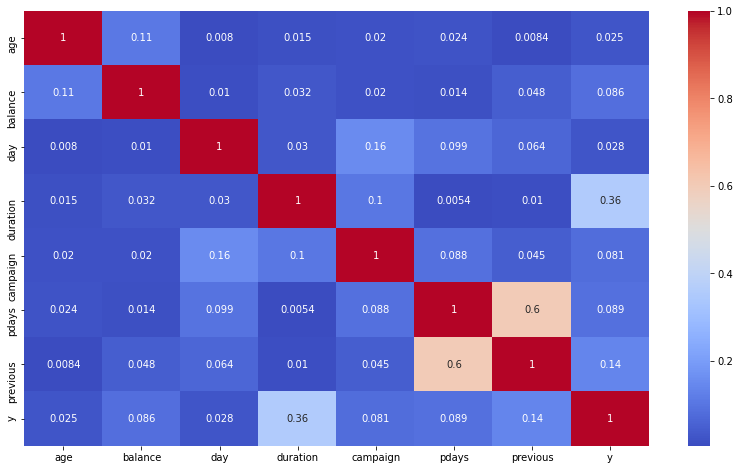

In [ ]:
plt.figure(figsize=(14,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
calc_vif(df[[i for i in columns]])

,variables,VIF
0,balance,1.499189
1,day,4.014122
2,duration,2.359535
3,campaign,2.147481
4,pdays,1.818316
5,previous,1.748055
6,age,5.652138


Since vif values for all columns is less then 10 ; there is no multicolineraity between the numerical columns.

**DATA PREPROCESSING**

First we will apply label encoding on binary categorical variables and one hot encoding on featuers having more then 2 categories.

In [ ]:
a=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
a['default'] = labelencoder_X_1.fit_transform(a['default'])

labelencoder_X_2 = LabelEncoder()
a['housing'] = labelencoder_X_2.fit_transform(a['housing'])

labelencoder_X_3 = LabelEncoder()
a['loan'] = labelencoder_X_3.fit_transform(a['loan'])

In [ ]:
a = pd.get_dummies(a, columns=["job",	"marital" , 	"education" , 	"contact" ,	"poutcome"], prefix=["n_job", "n_marital","n_edu" , "n_contact", "n_poutcome"])

We will drop month column as it dosent has much significane in predicting the output.

In [ ]:
a.drop(['month'], axis = 1, inplace = True) 



In [ ]:
a['y'].value_counts()

0    37489
1     4242
Name: y, dtype: int64

In [ ]:
a.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,n_job_admin.,n_job_blue-collar,n_job_entrepreneur,n_job_housemaid,n_job_management,n_job_retired,n_job_self-employed,n_job_services,n_job_student,n_job_technician,n_job_unemployed,n_job_unknown,n_marital_divorced,n_marital_married,n_marital_single,n_edu_primary,n_edu_secondary,n_edu_tertiary,n_edu_unknown,n_contact_cellular,n_contact_telephone,n_contact_unknown,n_poutcome_failure,n_poutcome_other,n_poutcome_success,n_poutcome_unknown
0,58,0,2143.0,1,0,5,261.0,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29.0,1,0,5,151.0,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2.0,1,1,5,76.0,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506.0,1,0,5,92.0,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1.0,0,0,5,198.0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [ ]:
X = a.loc[:, a.columns != 'y']
y = a['y']

In [ ]:
from sklearn.preprocessing import StandardScaler
XX = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve,roc_auc_score


Implementing all models and see which model gives best accuracy

Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
treeclf = tree.fit(X_train, y_train)

In [ ]:
train_class_preds = treeclf.predict(X_train)
test_class_preds = treeclf.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.905373831775701
The accuracy on test data is  0.9085899125434288


In [ ]:
y_pred_proba = treeclf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc_score(y_test,y_pred_proba)

0.8614475695699886

XGBOOST

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_model= xgb.fit(X_train, y_train)


In [ ]:
train_class_preds = xgb_model.predict(X_train)
test_class_preds = xgb_model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9154385334291877
The accuracy on test data is  0.9151791062657242


In [ ]:
y_pred_proba = xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc_score(y_test,y_pred_proba)

0.9103780915589894

In [ ]:
print(classification_report(y_train, train_class_preds))
print("\n")
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.93      0.99      0.95     29982
           1       0.70      0.30      0.42      3402

    accuracy                           0.92     33384
   macro avg       0.81      0.64      0.69     33384
weighted avg       0.90      0.92      0.90     33384



              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7507
           1       0.68      0.30      0.41       840

    accuracy                           0.92      8347
   macro avg       0.80      0.64      0.68      8347
weighted avg       0.90      0.92      0.90      8347



RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=8, n_estimators=50, random_state=0)
rad_clf = clf.fit(X_train , y_train)

In [ ]:
train_class_preds = rad_clf.predict(X_train)
test_class_preds = rad_clf.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9132818116462976
The accuracy on test data is  0.9138612675212652


In [ ]:
y_pred_proba = rad_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc_score(y_test,y_pred_proba)

0.9033452904273472

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.910136592379583
The accuracy on test data is  0.9145800886546065


In [ ]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc_score(y_test,y_pred_proba)

0.8960321160567598

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
train_class_preds = knn.predict(X_train)
test_class_preds = knn.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9178648454349388
The accuracy on test data is  0.9081106984545345


In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc_score(y_test,y_pred_proba)

0.7952873349952743

NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
train_class_preds = NB.predict(X_train)
test_class_preds = NB.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9178648454349388
The accuracy on test data is  0.9081106984545345


In [ ]:
y_pred_proba = NB.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc_score(y_test,y_pred_proba)

0.8042135276916148

SVM

In [ ]:
from sklearn import svm
svmclf= svm.SVC()
svmclf.fit(X_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
train_class_preds = svmclf.predict(X_train)
test_class_preds = svmclf.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9178648454349388
The accuracy on test data is  0.9081106984545345


In [ ]:
y_pred_proba = NB.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc_score(y_test,y_pred_proba)

0.8042135276916148

We find that XGBOOST gace highest accuracy and ROC AUC score.

But its F1 score was only 41% for class 1.

This was beacuse our dataset was imbalanced.

Hence I applied SMOTE to overcome it.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(a.loc[:, a.columns != 'y'], a['y'])

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape 45211
Resampled dataset shape 74978


In [ ]:
from sklearn.preprocessing import StandardScaler
XX_smote = StandardScaler().fit_transform(x_smote)

In [ ]:
from sklearn.model_selection import train_test_split

XX_train, XX_test, yy_train, yy_test = train_test_split(XX_smote, y_smote, test_size = 0.2, random_state = 3)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xxgb_model= xgb.fit(XX_train, yy_train)

In [ ]:
train_class_preds = xxgb_model.predict(XX_train)
test_class_preds = xxgb_model.predict(XX_test)

In [ ]:
train_accuracy = accuracy_score(train_class_preds,yy_train)
test_accuracy = accuracy_score(test_class_preds,yy_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9453502717481911
The accuracy on test data is  0.9421178981061616


In [ ]:
y_pred_proba = xxgb_model.predict_proba(XX_test)[:,1]
fpr, tpr, thresholds = roc_curve(yy_test, y_pred_proba)

roc_auc_score(yy_test,y_pred_proba)

0.986572480795967

In [ ]:
print(classification_report(yy_train, train_class_preds))
print("\n")
print(classification_report(yy_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     30086
           1       0.96      0.92      0.94     29896

    accuracy                           0.95     59982
   macro avg       0.95      0.95      0.95     59982
weighted avg       0.95      0.95      0.95     59982



              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7403
           1       0.96      0.92      0.94      7593

    accuracy                           0.94     14996
   macro avg       0.94      0.94      0.94     14996
weighted avg       0.94      0.94      0.94     14996



AS we can see after applying SMOTE the dataset is balanced and accuracy as well as ROC_AUC score of our model has also increased.

Even the F1 score has increased from 41 to 94%.

Then we apply hyperparameter tuning to find optimal parameters and further improve our model.

In [ ]:
from sklearn.model_selection import GridSearchCV
### Cross validation

xgb = XGBClassifier()
parameters = {'learning_rate': [0.1,0.3,0.5] , 'max_depth': [5,7] , 'alpha': [8,10,12] , 'n_estimators' : [10,20]}
DCR= GridSearchCV(xgb, parameters,scoring='roc_auc', cv=5)
DCR.fit(XX_train, yy_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [8, 10, 12], 'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [5, 7], 'n_estimators': [10, 20]},
             pre_dispat

In [ ]:
print(DCR.best_params_)
print(DCR.best_score_)

{'alpha': 8, 'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 20}
0.9887124517941601


Applying the parameters we obtained from hyperparameter tuning to our model.

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(alpha=8, learning_rate=0.5, max_depth=7 , n_estimators=20)
xxgb_model= xgb.fit(XX_train, yy_train)

In [ ]:
train_class_preds = xxgb_model.predict(XX_train)
test_class_preds = xxgb_model.predict(XX_test)

In [ ]:
train_accuracy = accuracy_score(train_class_preds,yy_train)
test_accuracy = accuracy_score(test_class_preds,yy_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9611216698342836
The accuracy on test data is  0.9484529207788743


In [ ]:
y_pred_proba = xxgb_model.predict_proba(XX_test)[:,1]
fpr, tpr, thresholds = roc_curve(yy_test, y_pred_proba)

roc_auc_score(yy_test,y_pred_proba)

0.9885612915583627

In [ ]:
print(classification_report(yy_train, train_class_preds))
print("\n")
print(classification_report(yy_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     30086
           1       0.98      0.94      0.96     29896

    accuracy                           0.96     59982
   macro avg       0.96      0.96      0.96     59982
weighted avg       0.96      0.96      0.96     59982



              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7403
           1       0.97      0.93      0.95      7593

    accuracy                           0.95     14996
   macro avg       0.95      0.95      0.95     14996
weighted avg       0.95      0.95      0.95     14996



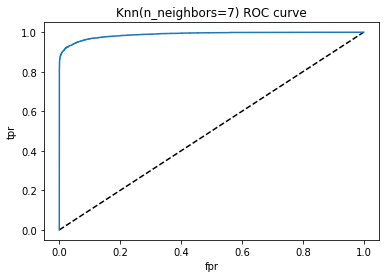

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='clf')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

After applying hyperparameter tuning our model performance has slightly incresed .

We are getting 
train accuracy - 96.1 %

test accuracy  - 94.9 %

ROC_AUC score  - 98.9 %

F1 score       - 95 %
